In [163]:
import numpy as np
import pandas as pd
import scanpy as sc

In [164]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.20.2 scipy==1.7.1 pandas==1.3.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.11 louvain==0.7.1 pynndescent==0.5.7


In [165]:
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

In [166]:
adata = sc.read_10x_mtx(
    'filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)     

... reading from cache file cache\filtered_gene_bc_matrices-hg19-matrix.h5ad


In [167]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [168]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [169]:
adata.obs

""
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1
...
TTTCGAACTCTCAT-1
TTTCTACTGAGGCA-1
TTTCTACTTCCTCG-1
TTTGCATGAGAGGC-1


In [170]:
adata.var

,gene_ids
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC145205.1,ENSG00000215635
BAGE5,ENSG00000268590
CU459201.1,ENSG00000251180
AC002321.2,ENSG00000215616


normalizing counts per cell
    finished (0:00:00)


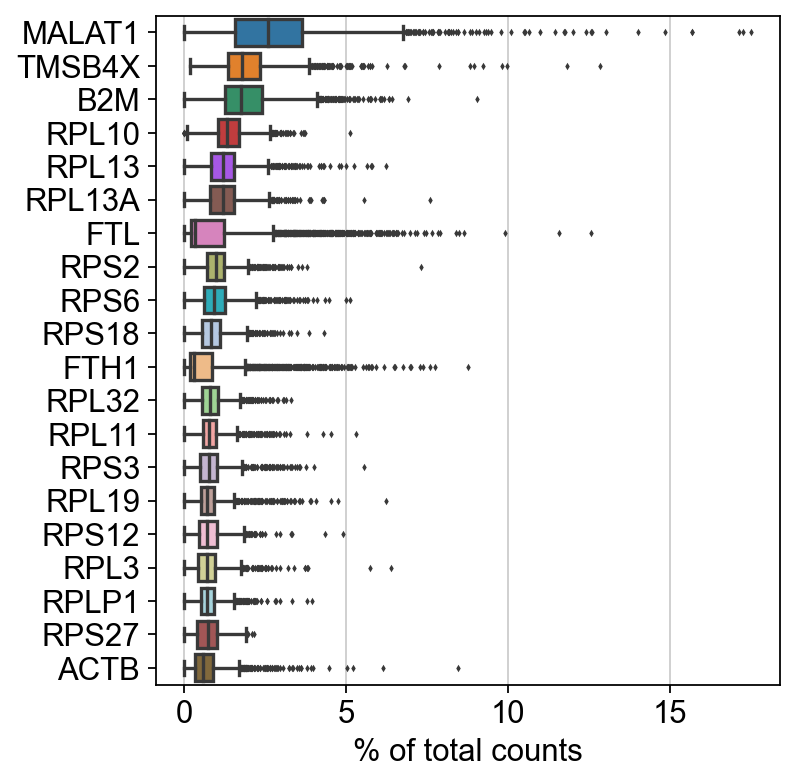

In [171]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [172]:
data=sc.read_h5ad("cortex.h5ad")
data

AnnData object with n_obs × n_vars = 3005 × 19972
    obs: 'cell_ids', 'label', 'label2'
    var: 'genes'

In [173]:
data.var.index=data.var["genes"].values
data.var.drop("genes",axis=1,inplace=True)

normalizing counts per cell
    finished (0:00:00)


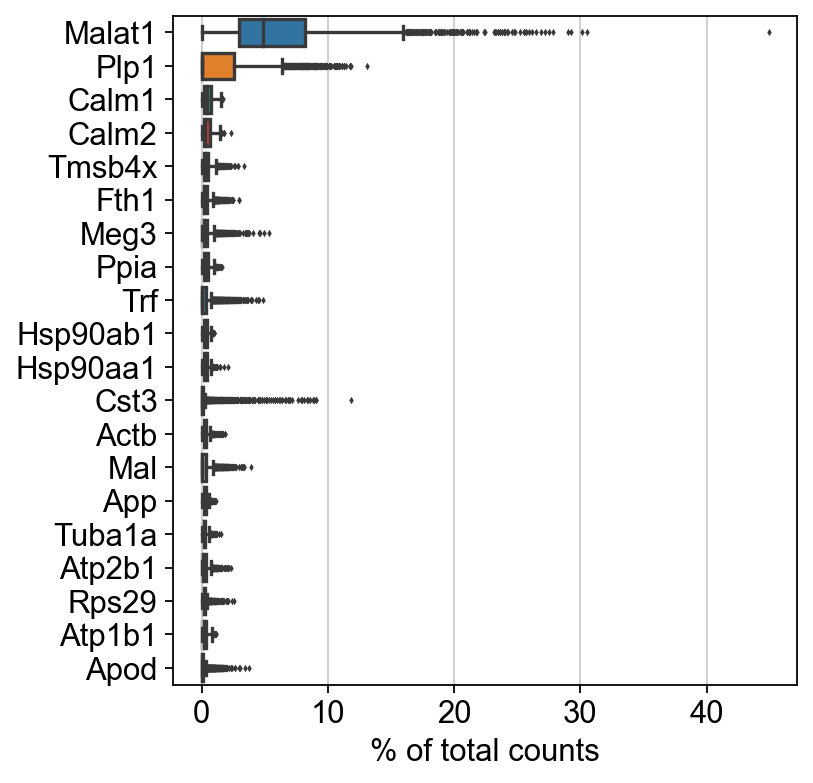

In [174]:
sc.pl.highest_expr_genes(data, n_top=20, )

In [175]:
sc.pp.filter_genes(data, min_cells=3)

filtered out 1093 genes that are detected in less than 3 cells


D:\anaconda\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
D:\anaconda\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [176]:
data

AnnData object with n_obs × n_vars = 3005 × 18879
    obs: 'cell_ids', 'label', 'label2'
    var: 'n_cells'

In [177]:
data.var['mt'] = data.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(data, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

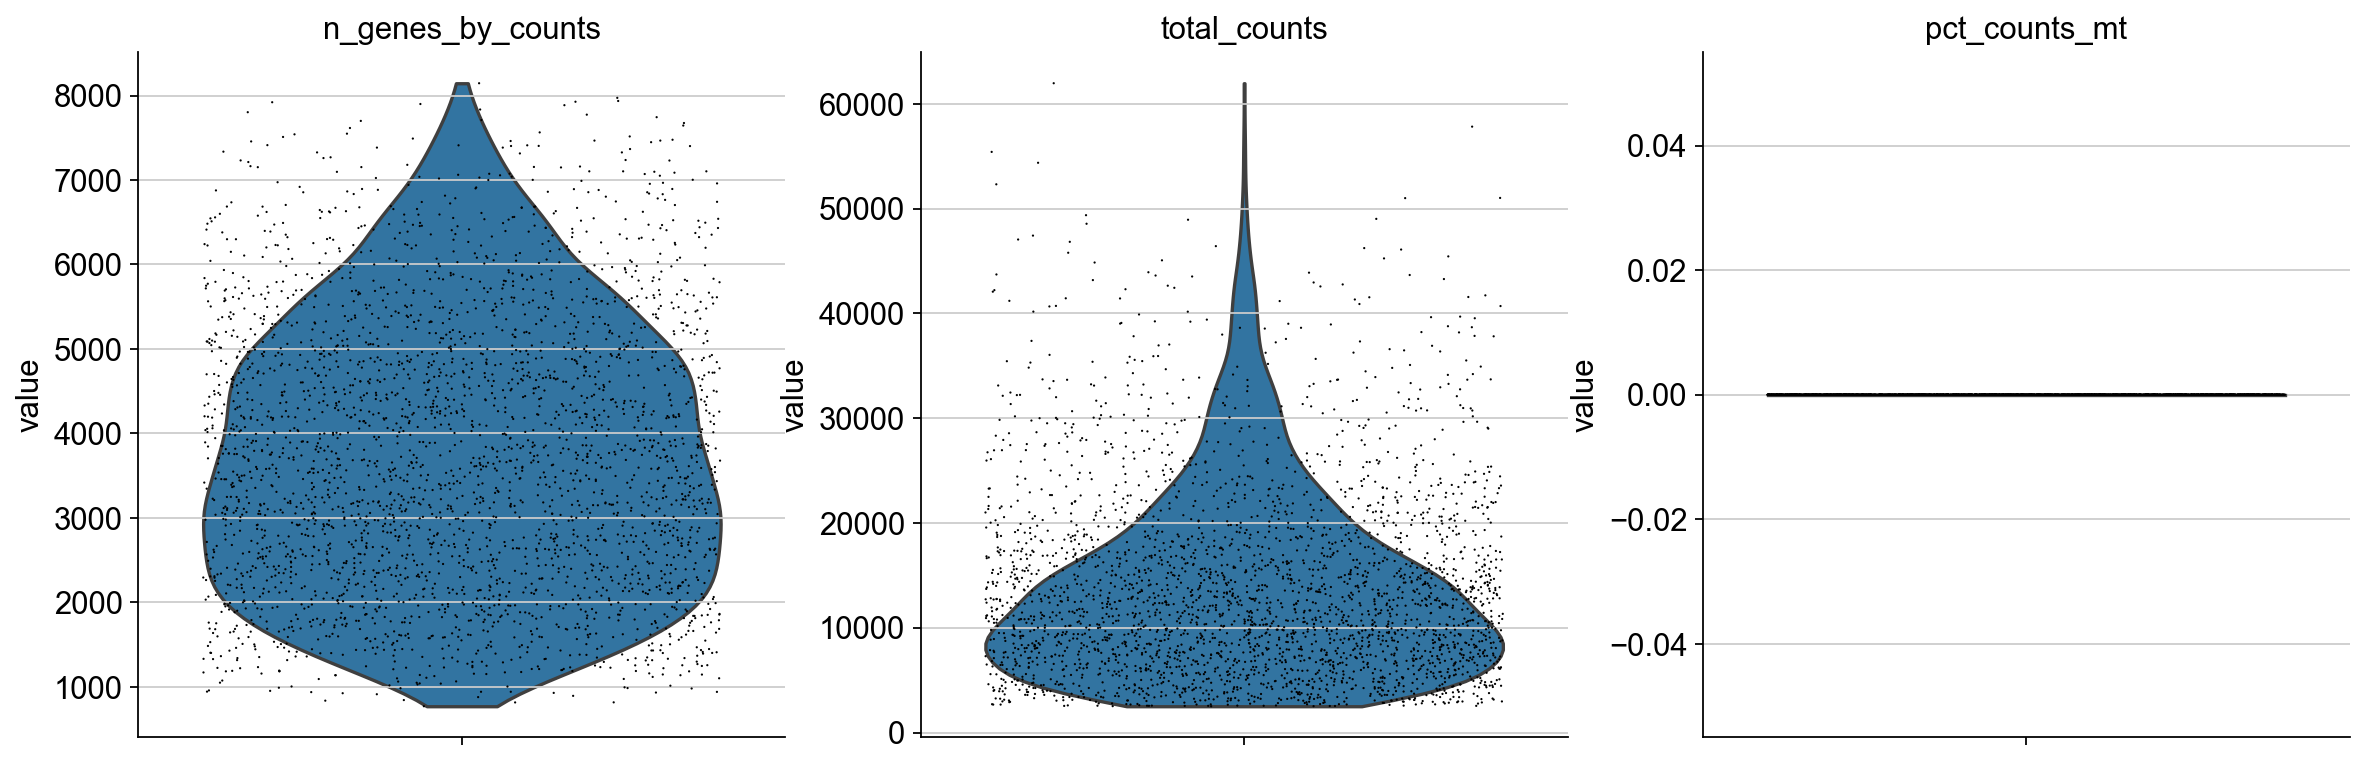

In [178]:
data.var_names_make_unique()  
sc.pl.violin(data, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

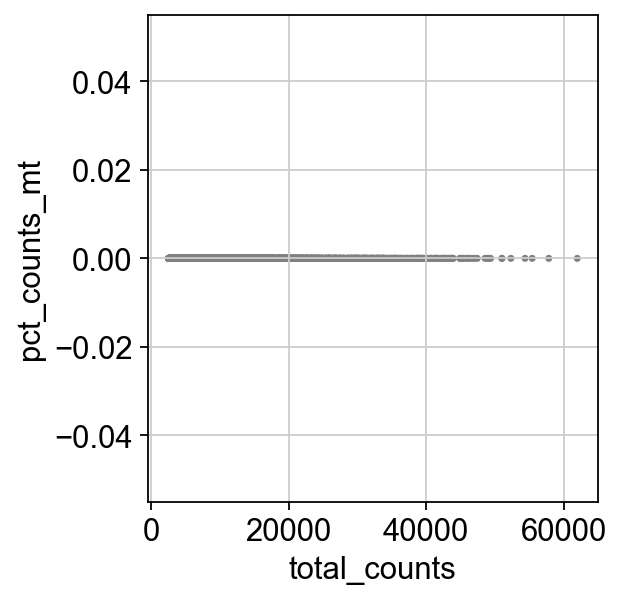

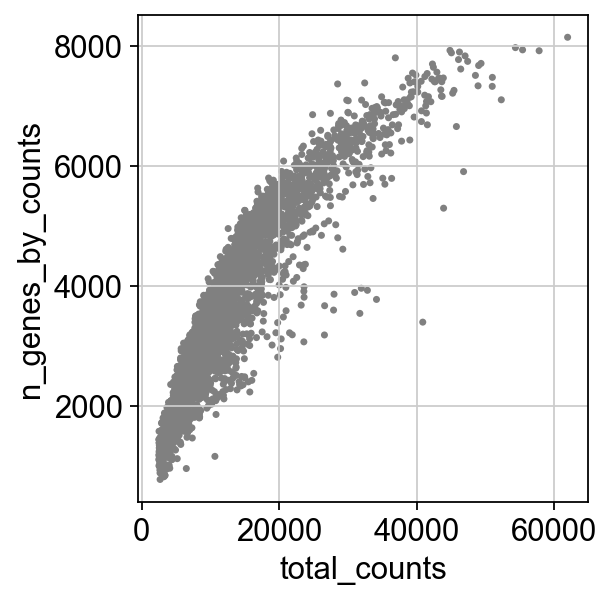

In [179]:
sc.pl.scatter(data, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(data, x='total_counts', y='n_genes_by_counts')

In [180]:
data = data[data.obs.n_genes_by_counts < 2500, :]
data = data[data.obs.pct_counts_mt < 5, :]

In [181]:
data.X.shape

(773, 18879)

In [183]:
sc.pp.highly_variable_genes(data, min_mean=125, max_mean=3000, min_disp=500)

extracting highly variable genes


ValueError: cannot specify integer `bins` when input data contains infinity

In [ ]:
sc.pl.highly_variable_genes(data)

In [ ]:
data.raw = data

In [ ]:
data = data[:, data.var.highly_variable]

In [ ]:
sc.pp.scale(data, max_value=10)

In [ ]:
data

In [ ]:
data.obs

In [ ]:
data.var

In [ ]:
data.X